# Computational Social Science Project #2 

*Group number:* 5

*Group members:*  Xue,Mingfeng
                  Sgambati,Tyrone
                  Lacey,Karalyn
                  Misunas,Christina
 

*Semester:* Fall 2022


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send KQ a pull request on GitHub flagging the syntax that's tripping you up 

## 1. Introduction/Setup

#### a) Import relevant libraries
Add the other libraries you need for your code below and/or as you go. 

In [1]:
# import libraries you might need here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. 

In [2]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                       #CountyFips needs to be a string so leading 0 isn't dropped (this is only if you want to make choropleth map): 
                       dtype={"CountyFIPS": str}) 

In [3]:
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [5]:
pd.set_option('display.max_rows', 100) # tells pandas how many rows to display when printing so results don't get truncated

# look at the data types for each column in diabetes df 
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [6]:
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


In [7]:
# Now do the same as above, but for "Obesity_Number" :
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 

['No Data']


In [8]:
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 

['No Data']


The values contained in the two columns above making them objects (rather than integers) appear to be strings like "No Data" and "Suppressed." Let's drop those rows in the next section, and also recode Physical_Inactivity_Number to be an integer. 

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' to. 

In [9]:
# Diabetes
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"]  # note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int') 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int') 

# Physical Inactivity

diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int') 

# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]
# change to numeric (specifically, integer or float?) from string (because originally included the "-" )
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float16')


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [10]:
# select count variables to rc to percentages; make sure we leave out ratios and our population variable b/c these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 'sex and age_total population_sex ratio (males per 100 females)', 'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') # recode all selected columns to numeric

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [12]:
pd.set_option('display.max_columns', None)
# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,9.285654e-02,0.019038,2.242079e-01
Obesity_Number,3112.0,2.516656e-01,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,2.008606e-01,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,inf,34.687500,2.200000e+02
race_total population,3112.0,1.036826e+05,228.000000,1.009805e+07
race_total population_one race,3112.0,9.760594e-01,0.713126,1.000000e+00
race_total population_two or more races,3112.0,2.394059e-02,0.000000,2.868743e-01
race_total population_one race_1,3112.0,9.760594e-01,0.713126,1.000000e+00
race_total population_one race_white,3112.0,8.311072e-01,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,9.021540e-02,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. 

In [13]:
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['race_total population_two or more races_1',
 'sex and age_total population',
 'race_total population_one race_1',
 'sex and age_total population_65 years and over_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_18 years and over_1']

In [14]:
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

## 2. Exploratory Data Analysis

Text(0.5, 1.0, 'Top 30 Correlation Coefficients between Features and Diabetes_Number')

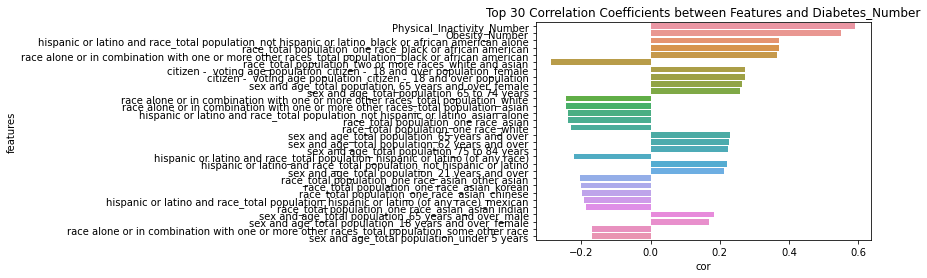

In [15]:
# Mingfeng: Correlation between Diabetes_Number and features gives us a general picture of the relationship.

corr_df=pd.DataFrame({'features':diabetes.drop(['County', 'CountyFIPS','State','Diabetes_Number'],axis=1).columns,
    'cor':[diabetes[i].astype('float').corr(diabetes['Diabetes_Number']) for i in diabetes.drop(['County', 'CountyFIPS','State','Diabetes_Number'],axis=1).columns]}
                    )
corr_df['abs_cor']=corr_df.cor.abs()

corr_df=corr_df.sort_values('abs_cor',ascending=False)

sns.barplot(x="cor", y="features", data=corr_df.iloc[0:30,:]).set_title("Top 30 Correlation Coefficients between Features and Diabetes_Number")

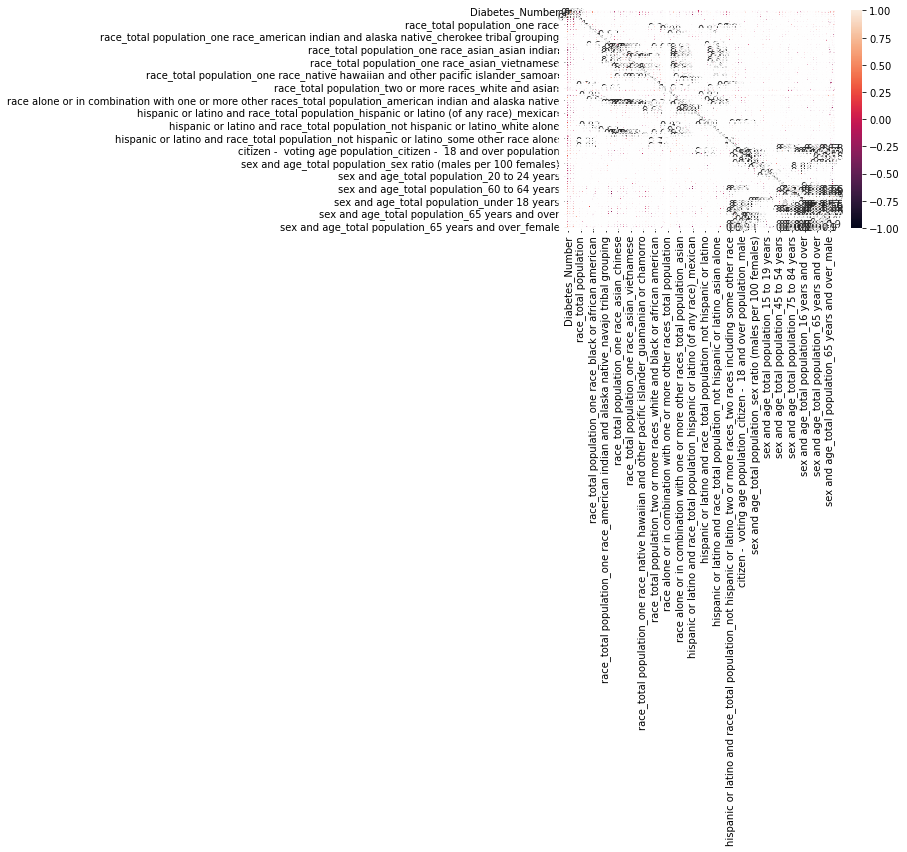

In [16]:
##import seaborn as sns

cor_matrix = diabetes.corr().round(2)
sns.heatmap(cor_matrix, annot=True)
plt.show()

C:\Users\mingf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Physical_Inactivity_Number', ylabel='Diabetes_Number'>

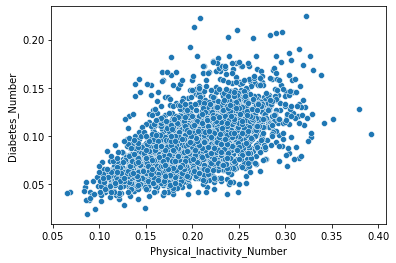

In [17]:
# GRAPHS TO USE FOR KARALYN

sns.scatterplot('Physical_Inactivity_Number', 'Diabetes_Number', data=diabetes)

C:\Users\mingf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Obesity_Number', ylabel='Diabetes_Number'>

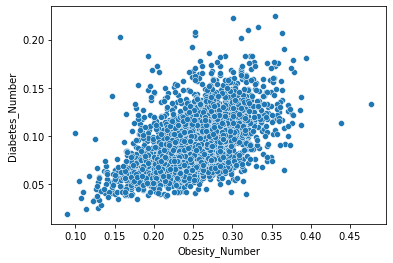

In [18]:
sns.scatterplot('Obesity_Number', 'Diabetes_Number', data=diabetes)

Text(0.5, 1.0, 'Density plot of Physical Inactivity')

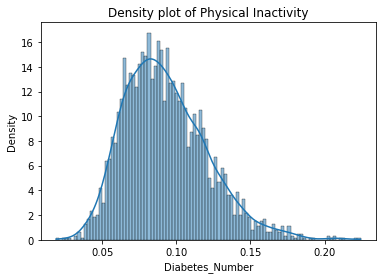

In [19]:
hist1 = sns.histplot(diabetes['Diabetes_Number'], stat = "density", kde = True, bins = 100)
hist1.set_xlabel("Diabetes_Number")
hist1.set_title("Density plot of Physical Inactivity")

Text(0.5, 1.0, 'Density plot of males per 100 females in counties of interest')

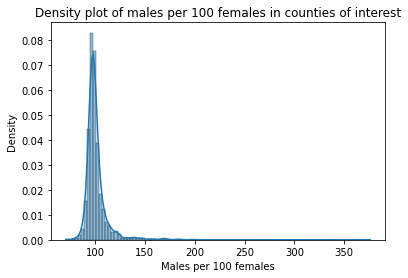

In [20]:
# Tyrone
hist1 = sns.histplot(diabetes['sex and age_total population_sex ratio (males per 100 females)'], stat = "density", kde = True, bins = 100)
hist1.set_xlabel("Males per 100 females")
hist1.set_title("Density plot of males per 100 females in counties of interest")

In [ ]:
# Christina
# Generating maps to visually identify counties with the highest rates of diabetes, overweight, physical inactivity 
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
import plotly.express as px

# Generating a map to identify counties with the highest rates of diabetes 
fig1 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Diabetes_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.01, 0.23),
                           scope="usa",
                           labels={'Diabetes_Number':'Rate of Diabetes'}
                          )
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
# Generating a map to identify counties with the highest rates of obesity
fig2 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Obesity_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.08, .48),
                           scope="usa",
                           labels={'Obesity_Number':'Rate of Obesity'}
                          )
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
# Generating a map to identify counties with the highest rates of physical inactivity
fig3 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Physical_Inactivity_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.06, 0.4),
                           scope="usa",
                           labels={'Physical_Inactivity_Number':'Rate of Physical Inactivity'}
                          )
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'State' to be a categorical variable using `pd.get_dummies` and drop 'County' using `.drop()` because 'CountyFIPS' is already a unique identifier for the county. 

In [24]:
drop_features=['County', 'CountyFIPS']

In [25]:
# create dummy features out of 'State' , which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['State'],  
                               drop_first = True) # only create 49 dummies by dropping first in category

# drop 'County' variable
diabetes_clean = diabetes_clean.drop(labels = drop_features,
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three 

In [26]:
diabetes['Diabetes_Number']

0       0.093804
1       0.080281
2       0.131875
3       0.105251
4       0.108977
          ...   
3215    0.058028
3216    0.019038
3217    0.069872
3218    0.078361
3219    0.084648
Name: Diabetes_Number, Length: 3112, dtype: float64

In [27]:
diabetes_clean.columns

Index(['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       ...
       'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah',
       'State_Vermont', 'State_Virginia', 'State_Washington',
       'State_West Virginia', 'State_Wisconsin', 'State_Wyoming'],
      dtype='object', length=136)

### 3.2/3.3 Partition Data and Feature Selection

Now, we will partition our data to prepare it for the training process. We will use 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

In [28]:
from sklearn.model_selection import train_test_split

# Set y 
y = diabetes_clean.Diabetes_Number

# X (everything except diabetes, our target)
X = diabetes_clean.drop('Diabetes_Number',axis=1)

We should also preprocess our data. Using the `preprocessing` module from sklearn, let's scale our features so that they are mean-centered.

In [29]:
from sklearn import preprocessing

X = preprocessing.scale(X)

We can also get rid of the 0 variance features using the `VarianceThreshold()` method from `feature_selection`. 

In [30]:
from sklearn import feature_selection

selector = feature_selection.VarianceThreshold(0)
X = selector.fit_transform(X)

And finally, let's split our data:

In [31]:
# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size=0.25, random_state=42)

In [32]:
X_train.shape

(1866, 134)

## 4. Train Models

In [33]:
# train your five models in this section 
## Technique 1: Ordinay linear regression
## Technique 2: Ridge regression
## Technique 3: Lasso regression

In [34]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# def rmse(pred, actual):
#     return np.sqrt(np.mean((pred - actual) ** 2))

In [35]:
## Christina: Technique 1 -- Ordinay linear regression
# create a model
lin_reg = LinearRegression()
# fit the model
lin_model = lin_reg.fit(X_train, y_train)


In [36]:
print(mean_squared_error(y_train,lin_reg.predict(X_train), squared=False))
print(r2_score(y_train,lin_reg.predict(X_train)))

0.018931878796692492
0.5527722676022118


In [37]:
# Karalyn: Technique 2 -- Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']
ridge_reg_data['Coefficient'] = ridge_reg_data['Coefficient'].astype(float)

Text(0.5, 1.0, 'Ridge Coefficients')

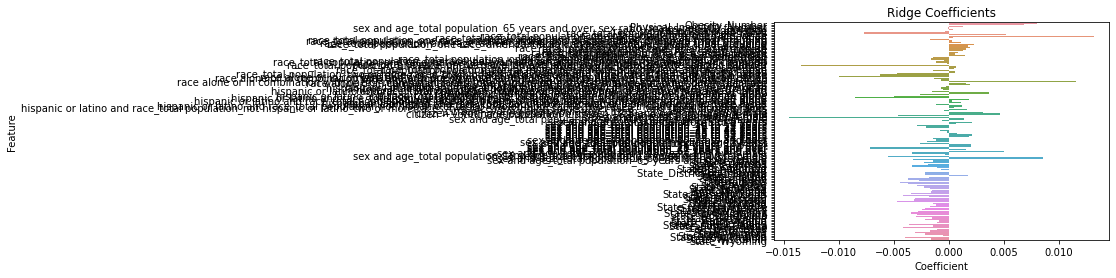

In [38]:
sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data).set_title("Ridge Coefficients")

In [39]:
print(mean_squared_error(y_train,ridge_reg.predict(X_train), squared=False))
print(r2_score(y_train,ridge_reg.predict(X_train)))

0.01895596448891738
0.5516335912218893


In [40]:
## Mingfeng: Technique 3 -- Lasso regression
# lasso regression with all features
lasso_reg = Lasso()  
# lasso_reg.fit(X=diabetes_clean.drop('Diabetes_Number',axis=1).iloc[0:500,0:1], y=diabetes_clean.Diabetes_Number[0:500])
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data['Coefficient'] = lasso_reg_data['Coefficient'].astype(float)

Text(0.5, 1.0, 'LASSO Coefficients')

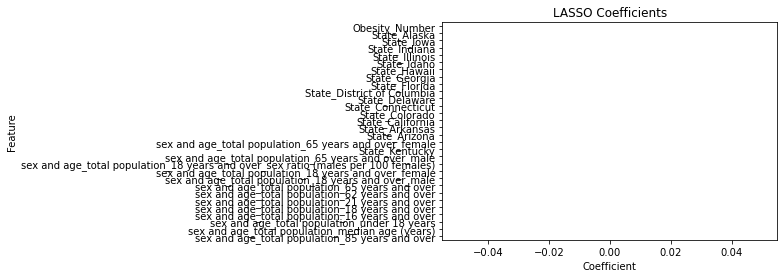

In [41]:
lasso_reg_data['abs_Coefficient']=lasso_reg_data.Coefficient.abs()
lasso_reg_data=lasso_reg_data.sort_values('abs_Coefficient',ascending=False)
sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data.iloc[0:30]).set_title("LASSO Coefficients")

In [42]:
print(mean_squared_error(y_train,lasso_reg.predict(X_train),  squared=False))
print(r2_score( y_train,lasso_reg.predict(X_train)))

0.028309314444614986
0.0


## 5. Validate and Refine Models

# 5.1 Predict on the Validation Set

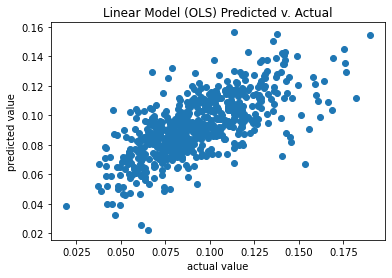

0.019528468128877065
0.483234591680225


In [43]:
# use X_validation and y_validation data sets to evaluate and refine your models

## Validation of the ordinary regression model
# predict the number of riders
lin_pred = lin_model.predict(X_validate)
# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,lin_pred,squared=False))
print(r2_score(y_validate,lin_pred))

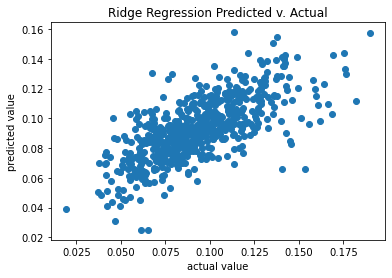

0.019426746409877432
0.48860412289556865


In [44]:
## Validation of the Ridge regression model
ridge_pred = ridge_reg.predict(X_validate)

plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Regression Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,ridge_pred, squared=False))
print(r2_score(y_validate,ridge_pred))

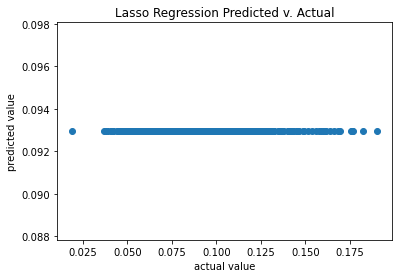

0.027174188588142145
-0.0006224681505604401


In [45]:
## Validation of the lasso regression model
lasso_pred = lasso_reg.predict(X_validate)
plt.scatter(y_validate, lasso_pred)
plt.title('Lasso Regression Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,lasso_pred, squared=False))
print(r2_score(y_validate,lasso_pred))

# 5.2 Feature Selection

In [46]:
# OLS feature selection
lin_reg_data = pd.DataFrame([lin_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
lin_reg_data['abs_coef'] = lin_reg_data.Coefficient.abs()
lin_reg_data=lin_reg_data.sort_values('abs_coef',ascending=False)

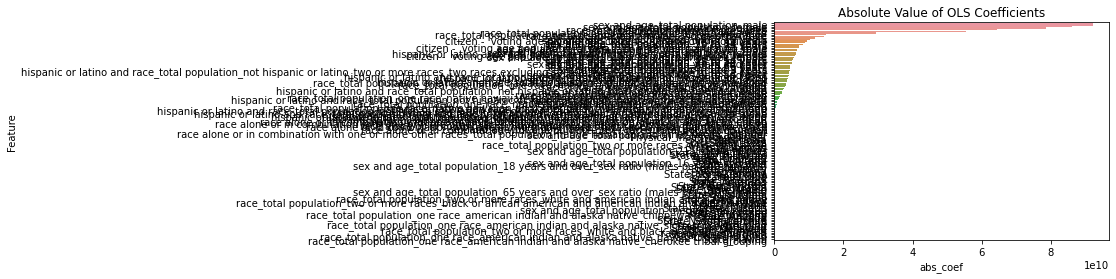

In [47]:
# Plot of Absolute Value of OLS Coefficients
ax = sns.barplot(x="abs_coef", y="Feature", data=lin_reg_data)
ax.set_title("Absolute Value of OLS Coefficients")
plt.show()

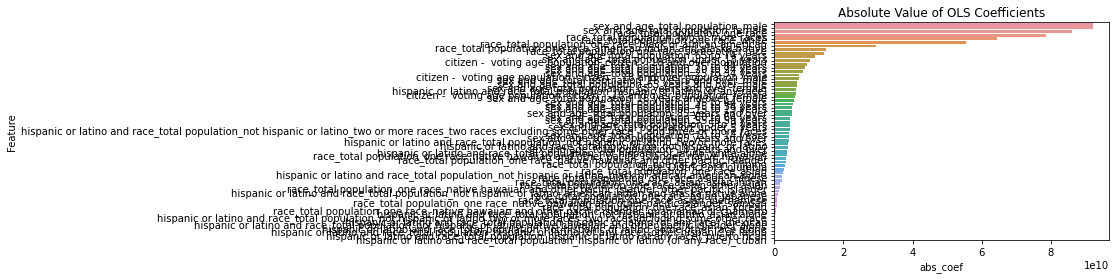

In [48]:
# Plot of Absolute Value of OLS Coefficients >1
ax = sns.barplot(x="abs_coef", y="Feature", data=lin_reg_data[lin_reg_data.abs_coef>1])
ax.set_title("Absolute Value of OLS Coefficients")
plt.show()

Answer: We use print out the coefficients data frame sorted according to abs_coef and found a cutoff point at 1 or more accurately at 0.114733, since there are no coefficients between 1 and 0.114733, we just use 1 for the sake of simplification.

In [49]:
lin_reg_data[lin_reg_data.abs_coef>1]

,Coefficient,Feature,abs_coef
56,92176858327.526031,sex and age_total population_male,92176858327.526031
57,92176858327.514755,sex and age_total population_female,92176858327.514755
4,86113073736.327606,race_total population_one race,86113073736.327606
5,78658316849.396149,race_total population_two or more races,78658316849.396149
6,-64445901956.089775,race_total population_one race_white,64445901956.089775
7,-55503447297.516922,race_total population_one race_black or africa...,55503447297.516922
8,-29441155094.852032,race_total population_one race_american indian...,29441155094.852032
26,-14975276223.855965,race_total population_one race_some other race,14975276223.855965
69,14430625699.736347,sex and age_total population_65 to 74 years,14430625699.736347
73,-11754341922.299955,sex and age_total population_under 18 years,11754341922.299955


In [50]:
# Ridge regression feature selection
ridge_reg_data = pd.DataFrame([ridge_model.coef_, diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']
ridge_reg_data['Coefficient'] = ridge_reg_data['Coefficient']
ridge_reg_data['abs_coef'] = ridge_reg_data.Coefficient.abs()
ridge_reg_data=ridge_reg_data.sort_values('abs_coef',ascending=False)

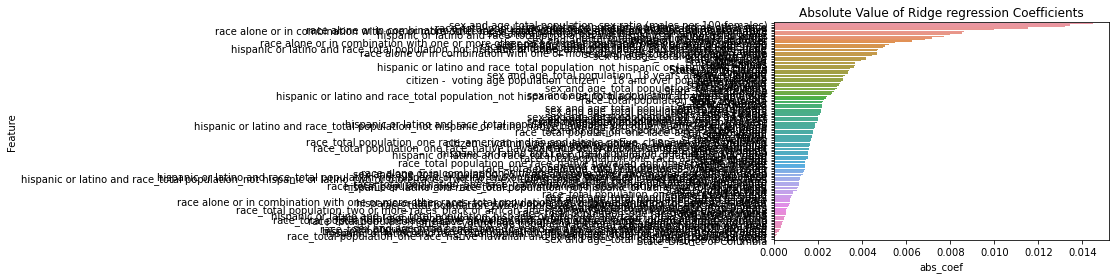

In [51]:
# Plot of Absolute Value of OLS Coefficients
ax = sns.barplot(x="abs_coef", y="Feature", data=ridge_reg_data)
ax.set_title("Absolute Value of Ridge regression Coefficients")
plt.show()

(array([14., 16., 19., 23., 16.,  7.,  9.,  6.,  3.,  5.,  3.,  1.,  0.,
         1.,  2.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  2.,  0.,  1.]),
 array([3.1312178855427785e-30, 0.0004828354286113333,
        0.0009656708572226666, 0.001448506285834, 0.0019313417144453332,
        0.0024141771430566663, 0.002897012571668, 0.0033798480002793334,
        0.0038626834288906665, 0.0043455188575019996, 0.004828354286113333,
        0.005311189714724667, 0.005794025143336, 0.006276860571947333,
        0.006759696000558667, 0.00724253142917, 0.007725366857781333,
        0.008208202286392666, 0.008691037715003999, 0.009173873143615332,
        0.009656708572226665, 0.010139544000838, 0.010622379429449333,
        0.011105214858060666, 0.011588050286672, 0.012070885715283333,
        0.012553721143894666, 0.013036556572505999, 0.013519392001117334,
        0.014002227429728667, 0.01448506285834], dtype=object),
 <BarContainer object of 30 artists>)

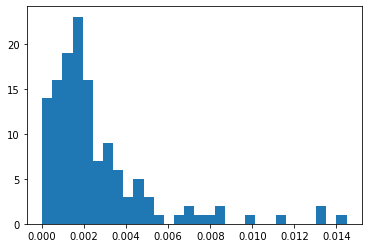

In [52]:
plt.hist(ridge_reg_data.abs_coef,bins=30)

Answer: We take the absolute value of 0.002 as the cutoff, which can select out many unimportant features.

In [53]:
ridge_reg_data[ridge_reg_data.abs_coef>0.002]

,Coefficient,Feature,abs_coef
58,-0.014485,sex and age_total population_sex ratio (males ...,0.014485
26,-0.013427,race_total population_one race_some other race,0.013427
8,0.013194,race_total population_one race_american indian...,0.013194
36,0.011547,race alone or in combination with one or more ...,0.011547
33,-0.00997,race alone or in combination with one or more ...,0.00997
83,0.008615,sex and age_total population_65 years and over...,0.008615
46,-0.008509,hispanic or latino and race_total population_n...,0.008509
0,0.007997,Obesity_Number,0.007997
6,-0.007694,race_total population_one race_white,0.007694
77,-0.007185,sex and age_total population_62 years and over,0.007185


In [54]:
# Lasso regression feature selection

lasso_reg_data = pd.DataFrame([lasso_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data['abs_coef'] = lasso_reg_data.Coefficient.abs()
lasso_reg_data.sort_values('abs_coef',ascending=False)[0:30]

,Coefficient,Feature,abs_coef
0,0.0,Obesity_Number,0.0
84,-0.0,State_Alaska,0.0
98,-0.0,State_Iowa,0.0
97,0.0,State_Indiana,0.0
96,-0.0,State_Illinois,0.0
95,-0.0,State_Idaho,0.0
94,-0.0,State_Hawaii,0.0
93,0.0,State_Georgia,0.0
92,0.0,State_Florida,0.0
91,0.0,State_District of Columbia,0.0


Answer: LASSO tend to push coefficients to zero so feature selection can be done. We chose the top 30 features according to the absolute values of their coefficients

# 5.3 Test Set

Based on R squared and RMSE, our best model is Ridge regression. Then we use 0.002 as the coefficient cutoff to select out unimportant features. Then we retrain the model and try on test data.

In [55]:
feature_index=ridge_reg_data.loc[ridge_reg_data.abs_coef>0.002,'Feature']

feature_index=diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()].isin(feature_index)

re_ridge_reg = Ridge()
# fit the model
re_ridge_model = ridge_reg.fit(X_train[:,feature_index], y_train)

y_test_predict=re_ridge_model.predict(X_test[:,feature_index])
print(mean_squared_error(y_test,y_test_predict, squared=False))
print(r2_score(y_test,y_test_predict))

0.021401286693833736
0.4299099626272719


## 6. Discussion Questions

In [1]:
# insert responses for discussion Qs here